<a href="https://colab.research.google.com/github/olfabre/DataMaining_Master_2/blob/main/TP2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Analyse prédictive
2.1. Classification supervisée

charger les données

In [3]:
# Importation des bibliothèques
import pandas as pd

# Chargement du fichier CSV (remplace le chemin si nécessaire)
df = pd.read_csv("adult.train.csv")

# Afficher les 5 premières lignes pour vérifier le contenu
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Examinons la structure des données

In [4]:
# Informations générales sur les colonnes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Lister les colonnes et leurs types

In [5]:
# Lister les noms des colonnes et leurs types
df.dtypes


,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


Identifier la variable à prédire

In [6]:
# Afficher les valeurs uniques de la colonne 'class'
df['class'].unique()


array(['<=50K', '>50K'], dtype=object)

Importer les bibliothèques

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Charger le CSV

In [9]:
df = pd.read_csv("adult.train.csv")  # adapte le chemin si nécessaire
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Taille du jeu et aperçu des colonnes

In [10]:
n_rows, n_cols = df.shape
print(f"Lignes: {n_rows} | Colonnes: {n_cols}")
df.columns.tolist()

Lignes: 32561 | Colonnes: 15


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

Nombre d’attributs et types

In [11]:
print("=== info ===")
df.info()

print("\n=== dtypes ===")
df.dtypes


=== info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

=== dtypes ===


,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


Variable à prédire et équilibrage des classes

Valeurs uniques de la cible:
['<=50K' '>50K']

Répartition brute:
class
<=50K    24720
>50K      7841
Name: count, dtype: int64

Répartition en %:
class
<=50K    75.919
>50K     24.081
Name: proportion, dtype: float64


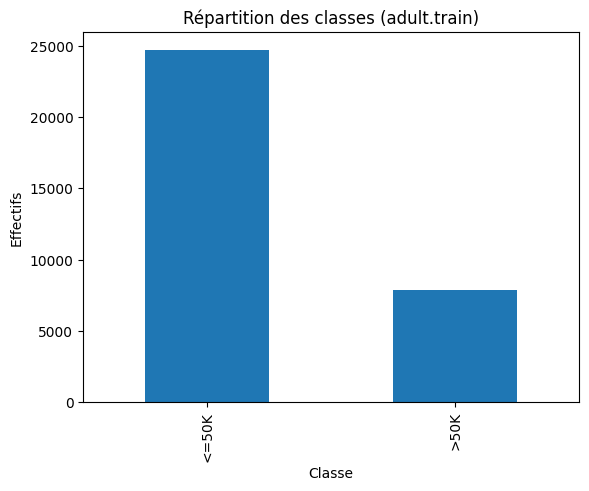

In [12]:
# La cible s'appelle 'class'
print("Valeurs uniques de la cible:")
print(df['class'].unique())

print("\nRépartition brute:")
class_counts = df['class'].value_counts()
print(class_counts)

print("\nRépartition en %:")
class_perc = (df['class'].value_counts(normalize=True) * 100).round(3)
print(class_perc)

# Graphique simple
plt.figure()
class_counts.plot(kind="bar")
plt.title("Répartition des classes (adult.train)")
plt.xlabel("Classe")
plt.ylabel("Effectifs")
plt.show()


Détection des valeurs manquantes encodées par « ? »

In [13]:
# Compte des '?' par colonne
missing_counts = (df == "?").sum()

# Colonnes concernées uniquement
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)

print("Colonnes avec '?' et leur nombre :")
print(missing_cols)

# Pourcentages
if len(missing_cols) > 0:
    missing_perc = (missing_cols / len(df) * 100).round(3)
    print("\nPourcentages de '?' par colonne :")
    print(missing_perc)


Colonnes avec '?' et leur nombre :
occupation        1843
workclass         1836
native-country     583
dtype: int64

Pourcentages de '?' par colonne :
occupation        5.660
workclass         5.639
native-country    1.790
dtype: float64


Convertir « ? » en valeurs manquantes standard (NaN)

In [14]:
df_na = df.replace("?", np.nan)

# Vérification des NaN après conversion
na_counts = df_na.isna().sum()
na_cols = na_counts[na_counts > 0].sort_values(ascending=False)

print("Colonnes avec NaN après conversion :")
print(na_cols)

Colonnes avec NaN après conversion :
occupation        1843
workclass         1836
native-country     583
dtype: int64


Import des bibliothèques

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

Charger les données

In [16]:
df = pd.read_csv("adult.train.csv")

# Supprimer les lignes contenant des '?'
df = df.replace("?", np.nan)

Sélectionner uniquement les colonnes numériques

In [17]:
# Garder seulement les colonnes numériques
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Variable cible
y = df["class"]

# Données numériques (X)
X = numeric_df.copy()

X.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Liste des classifieurs à comparer

In [18]:
models = {
    "Dummy (most_frequent)": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "SVM": SVC()
}

Pipeline commun : imputation + normalisation + modèle

In [19]:
from sklearn.model_selection import cross_val_score

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
        ("clf", model)
    ])

    # Validation croisée à 5 plis
    scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
    results[name] = scores.mean()

results


{'Dummy (most_frequent)': np.float64(0.7591904454179904),
 'Logistic Regression': np.float64(0.8150856008640439),
 'KNN': np.float64(0.8029236886272815),
 'Decision Tree': np.float64(0.7707994896617651),
 'Random Forest': np.float64(0.8071619565631541),
 'Gradient Boosting': np.float64(0.8403612450019636),
 'SVM': np.float64(0.8237461997192537)}

Afficher les performances triées

In [20]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_results:
    print(f"{name}: {score:.4f}")

Gradient Boosting: 0.8404
SVM: 0.8237
Logistic Regression: 0.8151
Random Forest: 0.8072
KNN: 0.8029
Decision Tree: 0.7708
Dummy (most_frequent): 0.7592
